# Who should you take in the NFL draft? - Data Exploration

## What does the data look like?

Now that we have the data scraped from the web, we can do some small exploration to see what the data looks like. First, of course, import the usual libraries plus override some matplotlib defaults:

In [7]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import cross_val_score
from sklearn import linear_model, ensemble, decomposition
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)
plt.style.use('ggplot')

With the following command we can read in the data we scraped in the web scrape notebook:

In [9]:
df = pd.read_csv('/Users/richard/data/NFL.csv', index_col='idx')

Pandas has a useful feature to give summary statistics for a given dataframe. The command is describe(), where I pass the option include= 'all' so that we have a summary for all data types, not just numerics. Also, I drop some columns which I don't really care for, which clutters the display:

In [30]:
drop_cols = ['Year', 'Player','Probowl']

df.drop(drop_cols, 1).describe(include='all')

,Pos,School,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Height_inches
count,3422,3422,3422.000000,3402.000000,2671.000000,2343.000000,2655.000000,2256.000000,2291.000000,3422.000000
unique,16,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,WR,Southern California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,502,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,242.548510,4.737190,33.460314,21.519846,114.867797,7.224880,4.349014,73.708065
std,NaN,NaN,43.111737,0.280294,4.023610,6.418670,8.594714,0.382225,0.247746,2.671061
min,NaN,NaN,149.000000,4.240000,19.500000,2.000000,88.000000,6.420000,3.730000,65.000000
25%,NaN,NaN,208.000000,NaN,NaN,NaN,NaN,NaN,NaN,72.000000
50%,NaN,NaN,236.000000,NaN,NaN,NaN,NaN,NaN,NaN,74.000000
75%,NaN,NaN,271.000000,NaN,NaN,NaN,NaN,NaN,NaN,76.000000


Ok, that's pretty interesting. This tells us quite a lot of information. For example, check out the Heigh_inches column. Tells use the mean, max and min, among other things. Let's see, who's the tallest person that's gone to the Combine?

In [35]:
df[df['Height_inches'] == df['Height_inches'].max()]

,Year,Player,Pos,School,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Height_inches,Probowl
idx,,,,,,,,,,,,,
1307,2006.0,Dennis Roland,OT,Georgia,328.0,5.28,NaN,19.0,NaN,NaN,NaN,82.0,False


Ok, so turns out that Dennis Roland, whom I've never hear of before, was the tallest person at the Combine

Suppose we want to know which school shows up the most in our Combine data:

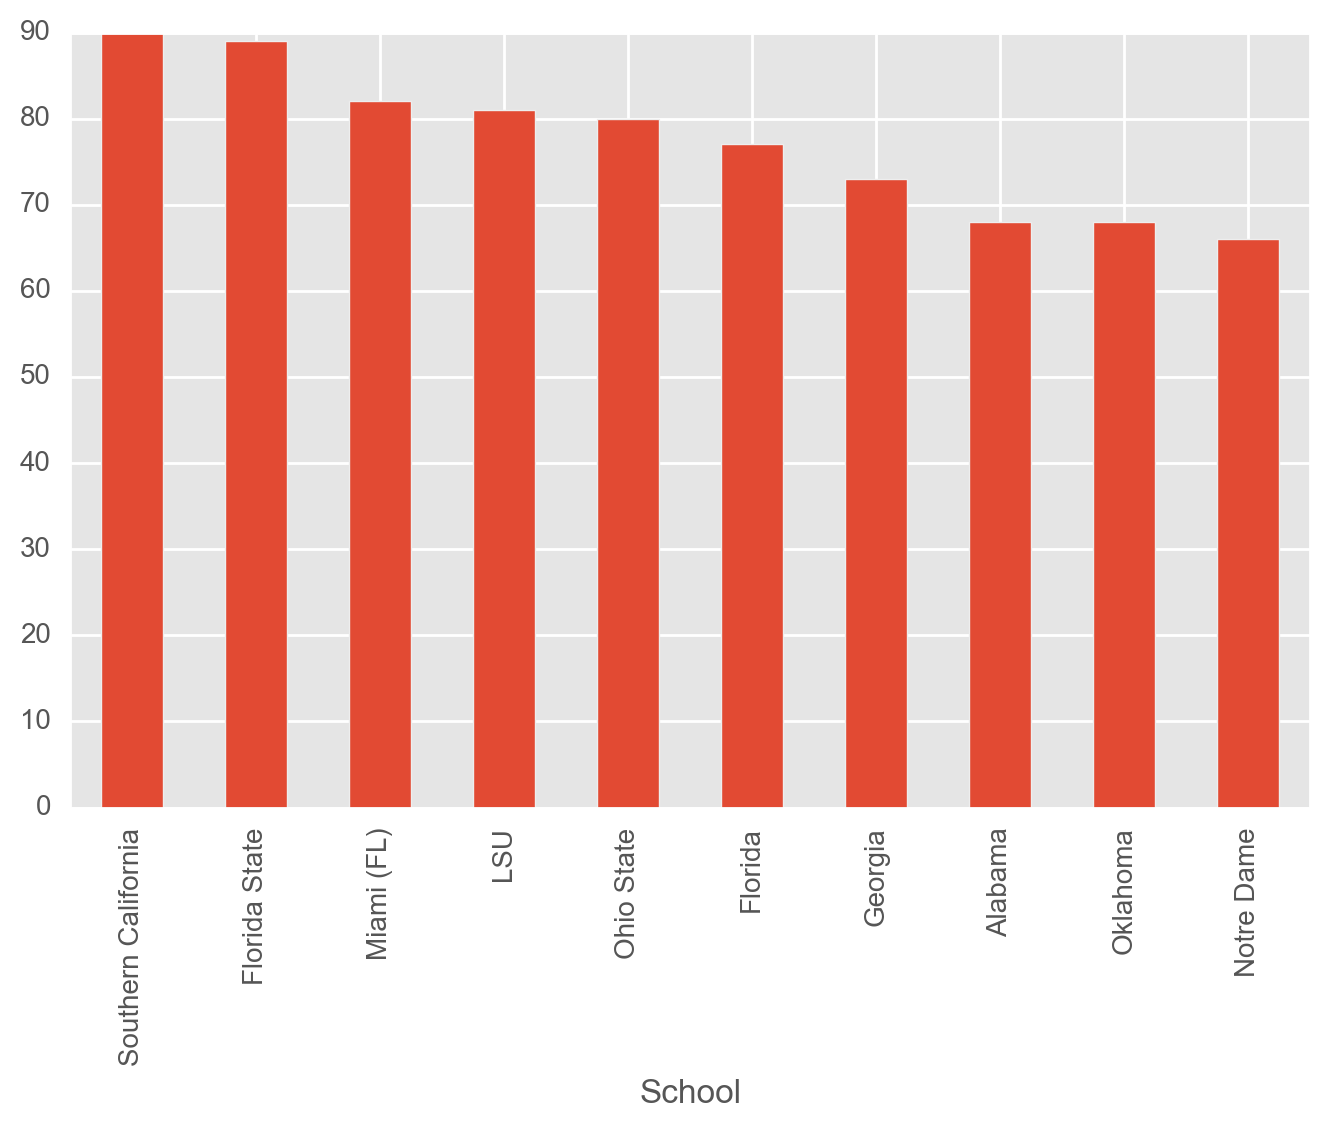

In [11]:
df.groupby('School').size().sort_values(ascending=False).head(n=10).plot(kind='bar');

Well, makes sense that Southern California churns out quite a lot of drafted players. But, do they produce the most probowlers?

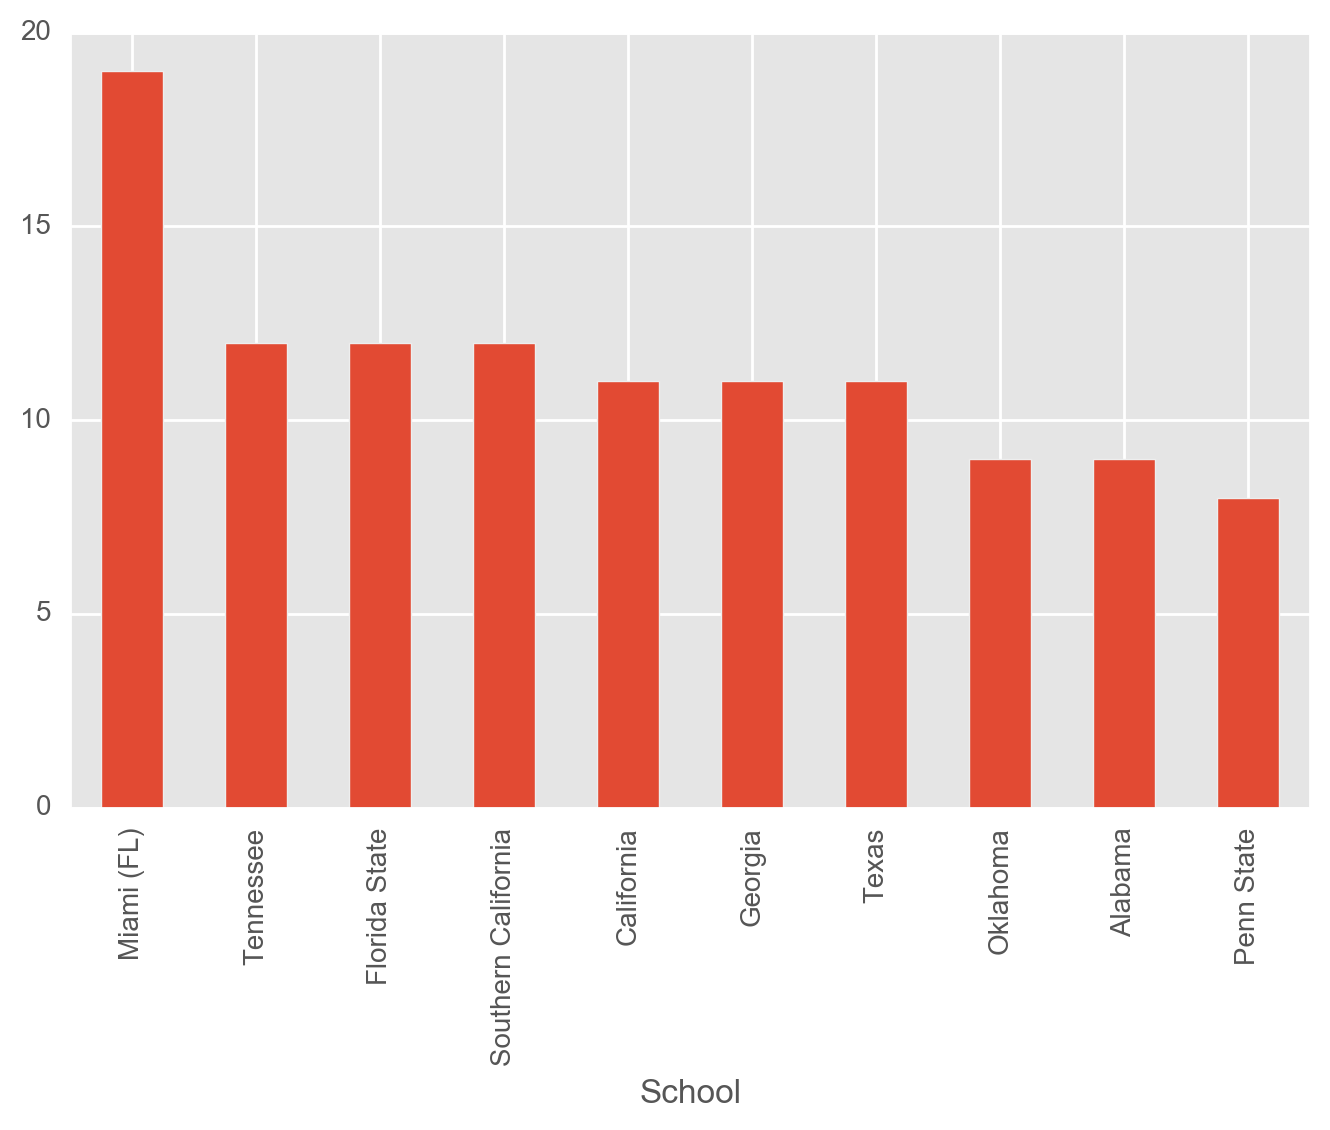

In [12]:
df[df['Probowl'] == True].groupby('School').size().sort_values(ascending=False).head(n=10).plot(kind='bar');

Having gone to Florida International University for undergrad, I'm not terribly happy with the outcome, but it turns out that University of Miami produces the most probowlers!

Next, by the numbers, which position is best represented in the probowl?

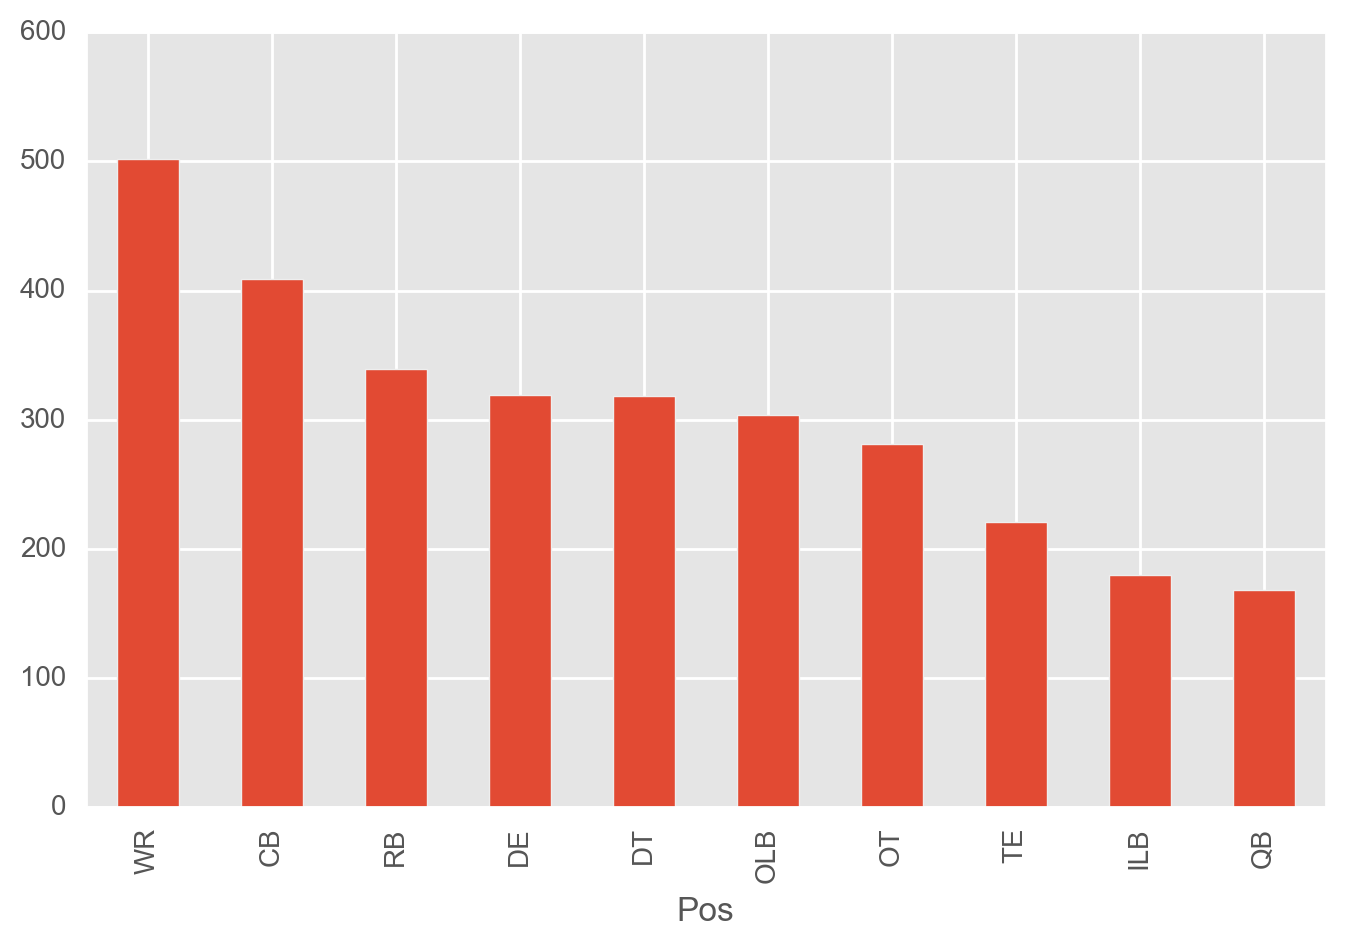

In [13]:
df.groupby('Pos').size().sort_values(ascending=False).head(n=10).plot(kind='bar');